here
(175,)
preprocessing time = 0.06
Average production temperature = 32.71 °C
Average heat production = 0.27 MWt


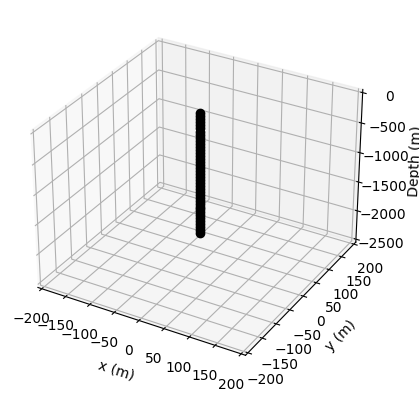

In [1]:
from sbt import run_sbt
# Tout Temperate over points in time
# Heat Production is MW = Enthapy
Tout = run_sbt(sbt_version=1, clg_configuration=1, m=24, Tin=30, GeoGradient=0.05, k_m=3)
Tout = Tout + 273.15 # C to K

interp_kW

In [2]:
import numpy as np
constant_pressure = 1e7 # in pascal 
Pout = [constant_pressure] * 175
Pout = np.array(Pout)
Pout.shape

(175,)

In [3]:
import CoolProp.CoolProp as CP
mdot = 24
Tinj = 300
Tamb = 300
Pin = 1e7 # in Pascal
# try specifing 100Bar output pressure and input pressure
enthalpy_out = CP.PropsSI("H", "T", Tout, "P", Pout, "H2O")
enthalpy_in = CP.PropsSI("H", "T", Tinj, "P", Pin, "H2O")
entropy_out = CP.PropsSI("S", "T", Tout, "P", Pout, "H2O")
entropy_in = CP.PropsSI("S", "T", Tinj, "P", Pin, "H2O")
kWe = (
mdot
* (enthalpy_out - enthalpy_in - Tamb * (entropy_out - entropy_in))
/ 1000.0
)
kWt = mdot * (enthalpy_out - enthalpy_in) / 1000.0
print(kWe, kWt)

[  7.91722889   1.13260485  23.58768225  73.21362366 147.32293828
 241.7656391  350.19431411 463.98984763 573.18367398 668.17859044
 741.5978002  789.51963487 811.70063553 810.8798749  791.58889498
 758.94215586 717.72631483 671.89310873 624.4025936  577.29492531
 531.86995464 488.88823917 448.74626251 411.60873953 377.4988198
 346.35492276 318.06469625 292.48486369 269.45308179 248.79548414
 230.33189071 213.87969396 199.2569743  186.28516679 174.79145235
 164.61095667 155.58872448 147.5814542  140.45890923 134.10486378
 128.4174322  123.30869246 118.70363436 114.53860044 110.75947678
 107.31990036 104.17968825 101.30359739  98.66042689  96.2224058
  93.96477703  91.86549122  89.9049561   88.06583361  86.33289276
  84.69297538  83.13506015  81.65035311  80.23229363  78.87638646
  77.5798364   76.3410417   75.15904989  74.03307935  72.96217424
  71.94501049  70.97982828  70.06444551  69.19630571  68.3725288
  67.58995124  66.84515685  66.13450604  65.45417148  64.80018589
  64.16850444

In [4]:
kWe

array([  7.91722889,   1.13260485,  23.58768225,  73.21362366,
       147.32293828, 241.7656391 , 350.19431411, 463.98984763,
       573.18367398, 668.17859044, 741.5978002 , 789.51963487,
       811.70063553, 810.8798749 , 791.58889498, 758.94215586,
       717.72631483, 671.89310873, 624.4025936 , 577.29492531,
       531.86995464, 488.88823917, 448.74626251, 411.60873953,
       377.4988198 , 346.35492276, 318.06469625, 292.48486369,
       269.45308179, 248.79548414, 230.33189071, 213.87969396,
       199.2569743 , 186.28516679, 174.79145235, 164.61095667,
       155.58872448, 147.5814542 , 140.45890923, 134.10486378,
       128.4174322 , 123.30869246, 118.70363436, 114.53860044,
       110.75947678, 107.31990036, 104.17968825, 101.30359739,
        98.66042689,  96.2224058 ,  93.96477703,  91.86549122,
        89.9049561 ,  88.06583361,  86.33289276,  84.69297538,
        83.13506015,  81.65035311,  80.23229363,  78.87638646,
        77.5798364 ,  76.3410417 ,  75.15904989,  74.03

In [39]:
kWt

array([-678.51939075,  259.46020218, 1196.69753502, 2130.0984403 ,
       3051.59275393, 3945.8988243 , 4790.108519  , 5556.11629767,
       6215.52729048, 6745.40462339, 7132.83655865, 7376.91877641,
       7487.8775178 , 7484.07263671, 7388.10823542, 7223.19750863,
       7010.49719155, 6767.62977576, 6508.2439552 , 6242.28822979,
       5976.65627151, 5715.93630564, 5463.09763438, 5220.03665069,
       4987.96675014, 4767.67107296, 4559.65081121, 4364.20280534,
       4181.45484172, 4011.37969786, 3853.80188718, 3708.40520118,
       3574.74480966, 3452.26474743, 3340.319852  , 3238.20035045,
       3145.15706618, 3060.42540126, 2983.246666  , 2912.8858303 ,
       2848.64526511, 2789.87446585, 2735.97605198, 2686.40853724,
       2640.68646145, 2598.3785142 , 2559.10425678, 2522.52997832,
       2488.36410976, 2456.35254466, 2426.2741046 , 2397.93628566,
       2371.17139175, 2345.83308315, 2321.79333664, 2298.93981483,
       2277.1735888 , 2256.40720517, 2236.56304525, 2217.57194